In [1]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

/usr/local/lib/python3.12/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
%%writefile home/lab3_prior.stan
generated quantities {
    int<lower=0> N = 50;
    real<lower=0, upper=1> p = beta_rng(2, 8);
    int<lower=0, upper=N> y = binomial_rng(N, p);
}


Overwriting home/lab3_prior.stan


In [3]:
gen_quant = CmdStanModel(stan_file='home/lab3_prior.stan')

INFO:cmdstanpy:compiling stan file /home/lab3_prior.stan to exe file /home/lab3_prior
INFO:cmdstanpy:compiled model executable: /home/lab3_prior


In [23]:
samples = gen_quant.sample(data={'N': 50}, fixed_param=True, iter_warmup = 1, iter_sampling=1000, chains=1)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [24]:
samples.draws_pd()

,lp__,accept_stat__,N,p,y
0,0.0,0.0,50.0,0.172485,7.0
1,0.0,0.0,50.0,0.123419,8.0
2,0.0,0.0,50.0,0.239142,13.0
3,0.0,0.0,50.0,0.108716,1.0
4,0.0,0.0,50.0,0.216878,7.0
...,...,...,...,...,...
995,0.0,0.0,50.0,0.061348,3.0
996,0.0,0.0,50.0,0.049015,1.0
997,0.0,0.0,50.0,0.191321,5.0
998,0.0,0.0,50.0,0.197794,8.0


In [25]:
ratio = samples.stan_variable('y') / samples.stan_variable('N')

In [26]:
ratio_mean = ratio.mean()
ratio_mean

0.19904000000000002

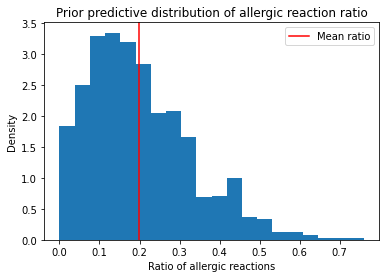

In [30]:
plt.hist(ratio, bins=20, density=True)
plt.axvline(x=ratio_mean, ymin=0, ymax = 4, color='r', label='Mean ratio')
plt.xlabel("Ratio of allergic reactions")
plt.ylabel("Density")
plt.title("Prior predictive distribution of allergic reaction ratio")
plt.legend()
plt.show()


In [77]:
#data - dane wejściowe
#parameters - parametry modelu

In [31]:
%%writefile home/lab3_posterior.stan

data {
    int<lower=0> N;
    int<lower=0, upper=N> y;
}

parameters {
    real<lower=0, upper=1> p;
}

model {
    p ~ beta(2, 8);
    y ~ binomial(N, p);
}

generated quantities {
    int<lower=0, upper=1> y_pred = binomial_rng(N, p);
}

Overwriting home/lab3_posterior.stan


In [32]:
gen_quant = CmdStanModel(stan_file='home/lab3_posterior.stan')

INFO:cmdstanpy:compiling stan file /home/lab3_posterior.stan to exe file /home/lab3_posterior
INFO:cmdstanpy:compiled model executable: /home/lab3_posterior


In [37]:
samples = gen_quant.sample(data={'N': 50, 'y': 7}, fixed_param=False, iter_warmup=200, iter_sampling=1000, chains = 1)

In [36]:
ratio = samples.stan_variable('y_pred') / 50



AttributeError: 'numpy.ndarray' object has no attribute 'draws_pd'

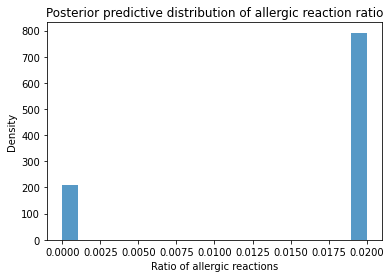

In [88]:
plt.hist(ratio, bins=20, density=True, alpha=0.75)
plt.xlabel("Ratio of allergic reactions")
plt.ylabel("Density")
plt.title("Posterior predictive distribution of allergic reaction ratio")
plt.show()

In [91]:
az_summary = az.summary(samples, var_names=['p', 'y_pred'], kind='stats', hdi_prob=0.94)
p_hdi_lower, p_hdi_upper = az_summary.loc['p', 'hdi3%'], az_summary.loc('p', 'hdi97%')

KeyError: 'hdi3%'

In [ ]:
probability_lower_than_average = np.mean(ratio_predicted_allergic_reactions < 0.2)
#p=0.135 lub p=0.8115